<a href="https://colab.research.google.com/github/HiyaJain22/Compute-Tasks/blob/main/Linear_Regression_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Implementing Linear Regression for predicting profit of a food truck given the population and profits of different cities


In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error


### Reading the dataset

In [21]:
#load dataset

df=pd.read_table('Data1.txt', delimiter = ',',names=['Population','Profit'])
df.reset_index()
df

,Population,Profit
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [22]:
#describe the dataframe
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Scatter plot of Population vs Profit

In [23]:
#plot

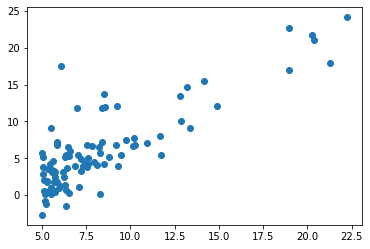

In [24]:
plt.scatter(df['Population'],df['Profit'])

In [25]:
df.insert(0,"ones",1)

In [26]:
print(df.head())

   ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233


### Function to compute the cost function 

In [27]:
### Function to compute the cost function 

In [28]:
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T) - y) , 2)
    return np.sum(inner_product) / (2 * len(X))

### Set training data (X) and target variable (y)

In [29]:
from sklearn.model_selection import train_test_split

X = df[['Population']]
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print("*****"*10)
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Shape of X_train: {X_train.shape}')
print("*****"*10)
print(f'Total # of sample in test dataset: {len(X_test)}')
print(f'Shape of X_test: {X_test.shape}')

Total # of sample in whole dataset: 97
**************************************************
Total # of sample in train dataset: 64
Shape of X_train: (64, 1)
**************************************************
Total # of sample in test dataset: 33
Shape of X_test: (33, 1)


### Converting dataframe to numpy matrices and creating a parameter (theta) matrix

In [34]:
#converting X,y into numpy matrix
X_mat = np.matrix(X.values)
y_mat = np.matrix(y.values)


In [35]:
#converting theta into numpy matrix
# take initial values as [0,0] for theta
theta = np.matrix(np.array([0,0]))
print(theta)

[[0 0]]


In [56]:
print(computeCost(X_mat,y_mat,theta))

ValueError: ignored

### Function to perform gradient descent on parameters theta by repeatedly updating the parameters

In [38]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, we are calculating the changes to be made to the
    # parameter (theta) value to reduce the error (cost)

        # number of parameters to be calculated,here we have 2 parameters theta [0,0] and theta [0,1]
        
        
    return theta, cost

### Set values for learning rate and number of iterations
- alpha here denotes the learning rate that helps to determine how quickly the algorithm
    will converge to the optimal solution
- iters denotes the number of iterations

In [40]:
alpha=0.01 
iters=1000
theta, cost = gradientDescent(X_mat,y_mat,theta,alpha,iters)





### Using Matplotlib library to visualize our solution using scatter plot

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

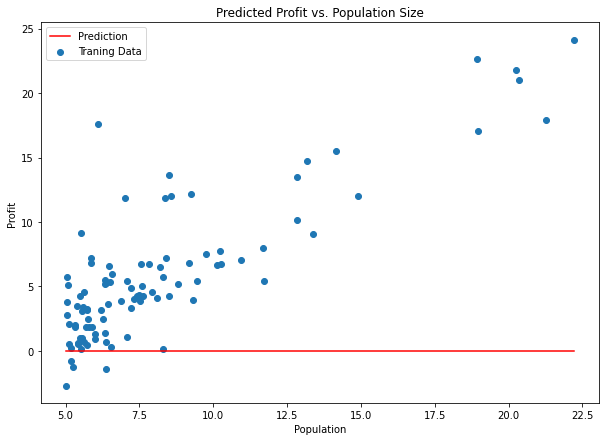

In [41]:
# linspace function will create an evenly-spaced series of points within the range of our data
x = np.linspace(df.Population.min(), df.Population.max(), 100)  
f = theta[0, 0] + (theta[0, 1] * x)

fig, ax = plt.subplots(figsize=(10, 7))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(df.Population, df.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')


Text(0.5, 1.0, 'Error vs Training epoch')

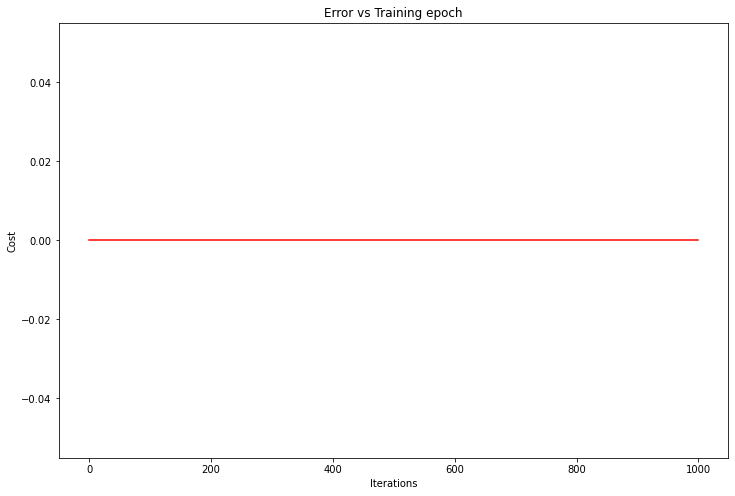

In [43]:

fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(np.arange(iters),cost,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs Training epoch')

SCIKIT LEARN IMPLEMENTATION

-Implement various type of errors,
 eg.Mean squared error,R_squared_score
choose best for the evaluting model,
and justify why it is best


In [44]:
#fit the model
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept = True)

In [45]:
model.fit(X_train, y_train)

LinearRegression()

In [46]:
pred = model.predict(X_test)

In [47]:
#predict the target values
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 72.10270958899645
Test score of trained model: 65.85859672651709


In [48]:
#evalute the model
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, pred))

Mean Squared Error: 10.765837150752038


In [49]:
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, pred)))


Root Mean Squared Error: 3.2811335161422552


In [50]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, pred))

Mean Absolute Error: 2.4583355713550614


In [51]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, pred))

R^2: 0.6585859672651709


In [52]:
import sklearn.metrics as m
n=X_test.shape[0]
p=X_test.shape[1] - 1
R2 = m.r2_score(y_test, pred)

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

Adjusted R Squared: 0.6585859672651709


In [53]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2 = r2_score(y_test, pred)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)

In [54]:
results = [MSE, RMSE, MAE, MAPE, r2, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

,Metric,Score
0,MSE,10.765837
1,RMSE,3.281134
2,MAE,2.458336
3,MAPE,181.008898
4,r2,0.658586
5,adj_r2,0.647573
